# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** M. Fakhrizal Nur Athoilah
- **Email:** 03fakhrizal@gmail.com
- **ID Dicoding:** fakhrizal25

## Menentukan Pertanyaan Bisnis

1. Bagaimana pengaruh musim dan kondisi cuaca terhadap jumlah penyewaan sepeda?
2. Bagaimana pola penggunaan sepeda berdasarkan jam dan hari dalam seminggu?
3. Bagaimana tren penyewaan sepeda berdasarkan hari dalam satu tahun?
4. Bagaimana tren penyewaan sepeda berdasarkan hari libur dan hari kerja?

## Import Semua Packages/Library yang Digunakan

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Data Wrangling

### Gathering Data

Hapus command jika ingin membaca dataset dengan import Google Drive.


In [26]:
# from google.colab import drive
# drive.mount('/content/drive')

In [27]:
day_df = pd.read_csv("./data/day.csv")
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [28]:
hour_df = pd.read_csv("./data/hour.csv")
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


**Insight:**
- Dataset `day_df` berisi data harian tentang jumlah pengguna sepeda yang terdaftar dan tidak terdaftar, berdasarkan berbagai faktor seperti cuaca, hari kerja/libur, musim, suhu, kelembaban, dan kecepatan angin.
- Dataset `hour_df` berisi data penyewaan per jam, memberikan informasi lebih detail karena berisi data peminjaman sepeda per jam. Sama seperti `day_df`, tetapi dengan tambahan kolom hr (jam).

***Di bawah adalah karakter dari kedua dataset***

*Dataset characteristics*

Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv
	
	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

### Assessing Data

Cek informasi data

In [29]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [30]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [31]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [32]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [33]:
day_df.describe(include=['object'])

,dteday
count,731
unique,731
top,2012-12-31
freq,1


In [34]:
hour_df.describe(include=['object'])

,dteday
count,17379
unique,731
top,2012-12-31
freq,24


Cek missing value

In [35]:
print(day_df.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [36]:
print(hour_df.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Cek data duplikat

In [37]:
print("Jumlah data duplikat di day_df:", day_df.duplicated().sum())
day_df.describe()

Jumlah data duplikat di day_df: 0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [38]:
print("Jumlah data duplikat di hour_df:", hour_df.duplicated().sum())
hour_df.describe()

Jumlah data duplikat di hour_df: 0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [39]:
# Menghitung Z-Score untuk kolom 'cnt'
z_scores_day = np.abs(stats.zscore(day_df['cnt']))

# Menentukan threshold (contoh: Z-Score > 3 dianggap outlier)
threshold = 3
outliers = np.where(z_scores_day > threshold)

# Menampilkan baris yang merupakan outlier
day_df.iloc[outliers]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


In [40]:
# Menghitung Z-Score untuk kolom 'cnt'
z_scores_hour = np.abs(stats.zscore(hour_df['cnt']))
# Menampilkan baris yang merupakan outlier
hour_df.iloc[outliers]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


In [41]:
numeric_columns = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
for col in numeric_columns:
    print(f"Nilai negatif di kolom {col}: {day_df[day_df[col] < 0].shape[0]}")

Nilai negatif di kolom temp: 0
Nilai negatif di kolom atemp: 0
Nilai negatif di kolom hum: 0
Nilai negatif di kolom windspeed: 0
Nilai negatif di kolom casual: 0
Nilai negatif di kolom registered: 0
Nilai negatif di kolom cnt: 0


In [42]:
for col in numeric_columns:
    if col in hour_df.columns:
        print(f"Nilai negatif di kolom {col}: {hour_df[hour_df[col] < 0].shape[0]}")

Nilai negatif di kolom temp: 0
Nilai negatif di kolom atemp: 0
Nilai negatif di kolom hum: 0
Nilai negatif di kolom windspeed: 0
Nilai negatif di kolom casual: 0
Nilai negatif di kolom registered: 0
Nilai negatif di kolom cnt: 0


**Insight:**
- Setelah di teliti ada tipe data yang tidak sesuai yaitu dteday (object, perlu diperbaiki) Seharusnya tipe datetime agar bisa digunakan dalam analisis waktu dengan lebih mudah.
- Dari hasil info dataset, tidak ditemukan missing values dalam dataset `day_df` dan `hour_df`.
- Tidak ada data duplikat yang ditemukan dalam dataset `day_df` dan `hour_df`.
- Tidak ada outlier yang terdeteksi dalam dataset `day_df` dan `hour_df`.
- Tidak ada nilai negatif dalam kolom numerik baik di dataset `day_df` maupun `hour_df`. Data bersih dari anomali berupa nilai negatif, sehingga tidak perlu dilakukan perbaikan atau transformasi lebih lanjut terkait hal ini.

### Cleaning Data

Pada tahap ini dan tahap selanjutnya, sepertinya akan berfokus pada satu dataset saja yaitu `hour_df`. Karena setelah diteliti lebih dalam ternyata dataset `day_df` dengan `hour_df` itu sama, hanya saja `hour_df` memberikan informasi lebih detail daripada `day_df`. Jadi kita akan memakai hanya satu dataset sekarang.

In [43]:
#Mengubah dteday menjadi datetime
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [44]:
#Menghapus kolom
hour_df = hour_df.drop(columns=['instant', 'atemp'])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   season      17379 non-null  int64         
 2   yr          17379 non-null  int64         
 3   mnth        17379 non-null  int64         
 4   hr          17379 non-null  int64         
 5   holiday     17379 non-null  int64         
 6   weekday     17379 non-null  int64         
 7   workingday  17379 non-null  int64         
 8   weathersit  17379 non-null  int64         
 9   temp        17379 non-null  float64       
 10  hum         17379 non-null  float64       
 11  windspeed   17379 non-null  float64       
 12  casual      17379 non-null  int64         
 13  registered  17379 non-null  int64         
 14  cnt         17379 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(11)
memory usage: 2.0 MB


In [45]:
#Mapping data agar mempermudah dalam pembacaan data
hour_df.replace({
    "season": {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"},
    "yr": {0: 2011, 1: 2012},
    "mnth": {1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June", 
             7: "July", 8: "August", 9: "September", 10: "October", 11: "November", 12: "December"},
    "holiday": {0: "Not Holiday", 1: "Holiday"},
    "weathersit": {1: "Clear", 2: "Cloudly", 3: "Light Rain", 4: "Heavy Rain"},
    "workingday": {0: "Holiday", 1: "Working Day"},
    "weekday": {0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 
                5: "Friday", 6: "Saturday"}
}, inplace=True)

In [46]:
#Menyesuaikan satuan kolom temp, hum, windspeed
hour_df["temp"] = (hour_df["temp"] * 41).round().astype(int)
hour_df["hum"] = (hour_df["hum"] * 100).round().astype(int)
hour_df["windspeed"] = (hour_df["windspeed"] * 67).round().astype(int)

In [47]:
hour_df

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,2011-01-01,Spring,2011,January,0,Not Holiday,Saturday,Holiday,Clear,10,81,0,3,13,16
1,2011-01-01,Spring,2011,January,1,Not Holiday,Saturday,Holiday,Clear,9,80,0,8,32,40
2,2011-01-01,Spring,2011,January,2,Not Holiday,Saturday,Holiday,Clear,9,80,0,5,27,32
3,2011-01-01,Spring,2011,January,3,Not Holiday,Saturday,Holiday,Clear,10,75,0,3,10,13
4,2011-01-01,Spring,2011,January,4,Not Holiday,Saturday,Holiday,Clear,10,75,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,Spring,2012,December,19,Not Holiday,Monday,Working Day,Cloudly,11,60,11,11,108,119
17375,2012-12-31,Spring,2012,December,20,Not Holiday,Monday,Working Day,Cloudly,11,60,11,8,81,89
17376,2012-12-31,Spring,2012,December,21,Not Holiday,Monday,Working Day,Clear,11,60,11,7,83,90
17377,2012-12-31,Spring,2012,December,22,Not Holiday,Monday,Working Day,Clear,11,56,9,13,48,61


In [48]:
# Menyimpan DataFrame ke file CSV
main_data = 'main_data.csv'
hour_df.to_csv(main_data, index=False)

print(f"DataFrame berhasil disimpan sebagai {main_data}")

DataFrame berhasil disimpan sebagai main_data.csv


**Insight:**
- Kolom dteday disesuaikan dan diubah menjadi datetime.
- Menghapus atau drop kolom yang kurang berpengaruh, seperti *instant* dan *atemp*. Karena kolom instant hanya menampilkan ID jadi dirasa kurang memberikan informasi yang berguna, dan atemp jika dilihat dan diteliti secara seksama ternyata sudah direpresentasikan oleh kolom temp.
- Mapping data sesuai dengan karakteristik dataset, agar mudah saat membaca datanya.
- Menyesesuaikan satuan kolom temp, hum dan windspeed sesuai dengan karakteristik dataset.
- Jangan lupa kita simpan dataset yang telah dicleaning.

## Exploratory Data Analysis (EDA)

### Explore Bike Sharing Dataset

In [49]:
# 1. Pengaruh Musim dan Kondisi Cuaca terhadap Penyewaan Sepeda
season_weather = hour_df.groupby(['season', 'weathersit'])['cnt'].mean().reset_index()
print("\nRata-rata penyewaan sepeda berdasarkan musim dan kondisi cuaca:")
print(season_weather)


Rata-rata penyewaan sepeda berdasarkan musim dan kondisi cuaca:
    season  weathersit         cnt
0     Fall       Clear  244.494207
1     Fall     Cloudly  224.848997
2     Fall  Light Rain  171.955390
3   Spring       Clear  122.055535
4   Spring     Cloudly  103.074689
5   Spring  Heavy Rain   74.333333
6   Spring  Light Rain   58.650407
7   Summer       Clear  232.410983
8   Summer     Cloudly  181.261364
9   Summer  Light Rain  115.179803
10  Winter       Clear  209.463779
11  Winter     Cloudly  201.483974
12  Winter  Light Rain  116.453333


In [50]:
# 2. Pola Penggunaan Sepeda berdasarkan Jam dan Hari dalam Seminggu
hour_weekday = hour_df.groupby(['hr', 'weekday'])['cnt'].mean().unstack()
print("\nRata-rata penyewaan sepeda berdasarkan jam dan hari dalam seminggu:")
print(hour_weekday)


Rata-rata penyewaan sepeda berdasarkan jam dan hari dalam seminggu:
weekday      Friday      Monday    Saturday      Sunday    Thursday  \
hr                                                                    
0         52.432692   34.009524   94.304762   93.990385   39.271845   
1         24.721154   17.307692   67.780952   77.432692   17.223301   
2         12.740385   10.313131   50.495238   61.627451    9.156863   
3          6.598039    5.113402   22.885714   31.144231    5.071429   
4          6.072165    5.785714    7.657143    9.362745    5.280000   
5         23.903846   21.653846    8.291262    8.693878   25.912621   
6         90.028846   85.865385   21.000000   14.495146  107.436893   
7        254.326923  248.538462   45.961905   33.104762  304.737864   
8        462.278846  412.192308  114.476190   83.857143  488.572816   
9        258.990385  218.442308  186.790476  156.542857  240.873786   
10       157.730769  139.028846  263.723810  258.580952  132.563107   
11      

In [51]:
# 3. Tren Penyewaan Sepeda berdasarkan Hari dalam Satu Tahun
daily_trend = hour_df.groupby('dteday')['cnt'].sum().reset_index()
print("\nTotal penyewaan sepeda harian:")
print(daily_trend)


Total penyewaan sepeda harian:
        dteday   cnt
0   2011-01-01   985
1   2011-01-02   801
2   2011-01-03  1349
3   2011-01-04  1562
4   2011-01-05  1600
..         ...   ...
726 2012-12-27  2114
727 2012-12-28  3095
728 2012-12-29  1341
729 2012-12-30  1796
730 2012-12-31  2729

[731 rows x 2 columns]


In [52]:
# 4. Tren Penyewaan Sepeda berdasarkan Hari libur dan Hari kerja
workday_trend = hour_df.groupby('workingday')['cnt'].mean().reset_index()
print("\nRata-rata penyewaan sepeda berdasarkan hari kerja dan hari libur:")
print(workday_trend)


Rata-rata penyewaan sepeda berdasarkan hari kerja dan hari libur:
    workingday         cnt
0      Holiday  181.405332
1  Working Day  193.207754


**Insight:**
- `season_weather` Penyewaan sepeda cenderung lebih tinggi saat cuaca cerah di semua musim. Musim gugur (Fall) dengan cuaca cerah mencatat penyewaan tertinggi (244.49), diikuti oleh musim panas (Summer) dengan cuaca cerah (232.41). Cuaca mendung sedikit menurunkan penyewaan, terutama hujan lebat menyebabkan penurunan signifikan. Musim semi (Spring) memiliki rata-rata penyewaan terendah, hujan ringan (58.65) dan hujan lebat (74.33).
- `hour_weekday` Rata-rata penyewaan tertinggi terjadi pada Kamis pukul 17:00 dengan 527.35 penyewaan. 
- `daily_trend` Total penyewaan sepeda harian bervariasi setiap hari. Tren menunjukkan peningkatan penyewaan dari awal tahun 2011 hingga akhir 2012, dengan beberapa puncak di akhir tahun. Hari dengan penyewaan tertinggi adalah 28 Desember 2012 dengan 3.095 penyewaan.
- `workday_trend` Rata-rata penyewaan sepeda lebih tinggi pada hari kerja (193.21) dibandingkan hari libur (181.41), menunjukkan bahwa sepeda lebih sering digunakan untuk aktivitas rutin seperti bekerja atau sekolah.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh musim dan kondisi cuaca terhadap jumlah penyewaan sepeda?

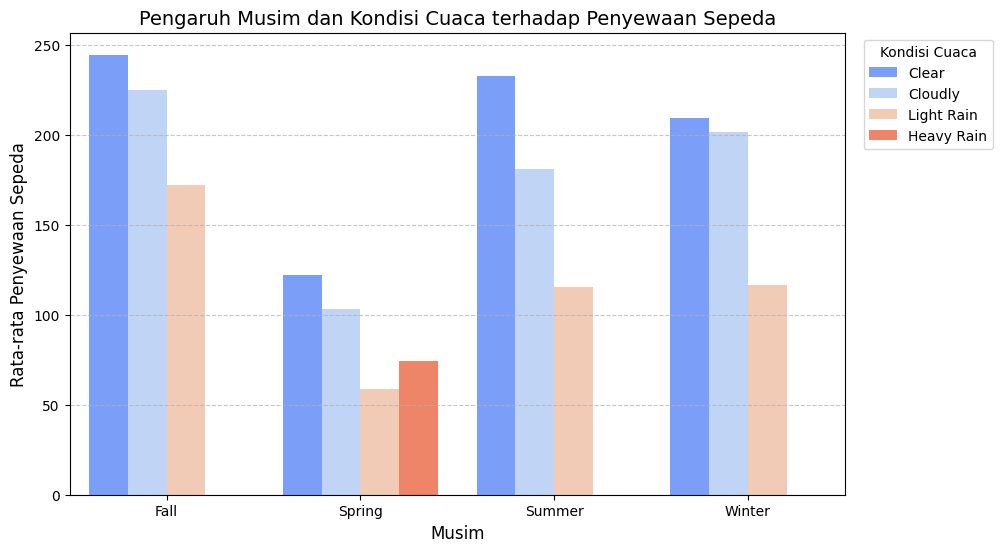

In [53]:
# Plot bar chart untuk melihat pengaruh musim dan kondisi cuaca terhadap penyewaan sepeda
plt.figure(figsize=(10, 6))
sns.barplot(data=season_weather, x="season", y="cnt", hue="weathersit", palette="coolwarm", saturation=1.2)

plt.title("Pengaruh Musim dan Kondisi Cuaca terhadap Penyewaan Sepeda", fontsize=14)
plt.xlabel("Musim", fontsize=12)
plt.ylabel("Rata-rata Penyewaan Sepeda", fontsize=12)
plt.legend(title="Kondisi Cuaca")
plt.legend(title="Kondisi Cuaca", loc="upper right", bbox_to_anchor=(1.2, 1))
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

### Pertanyaan 2: Bagaimana pola penggunaan sepeda berdasarkan jam dan hari dalam seminggu?

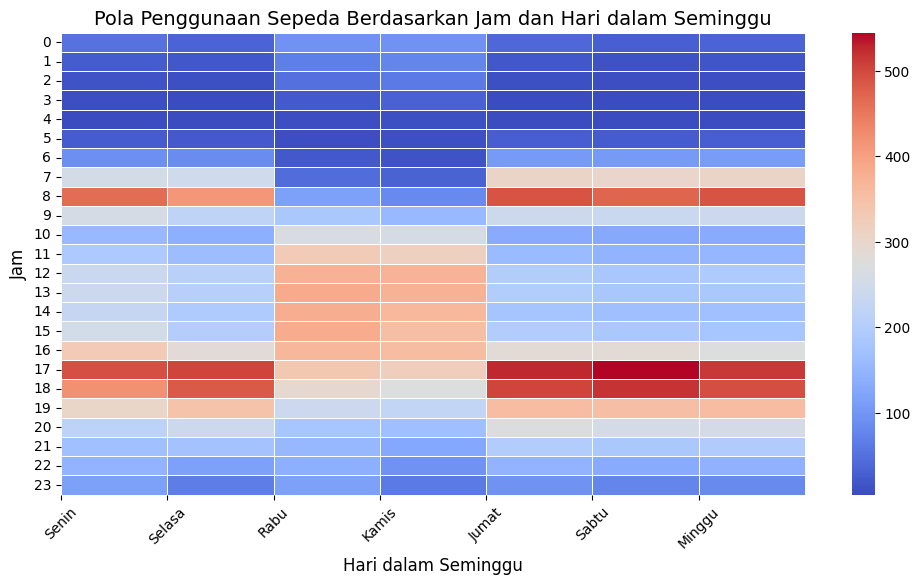

In [54]:
plt.figure(figsize=(12, 6))
sns.heatmap(hour_weekday, cmap="coolwarm", annot=False, linewidths=0.5)

plt.title("Pola Penggunaan Sepeda Berdasarkan Jam dan Hari dalam Seminggu", fontsize=14)
plt.xlabel("Hari dalam Seminggu", fontsize=12)
plt.ylabel("Jam", fontsize=12)
plt.xticks(ticks=range(7), labels=["Senin", "Selasa", "Rabu", "Kamis", "Jumat", "Sabtu", "Minggu"], rotation=45)
plt.yticks(rotation=0)
plt.show()

### Pertanyaan 3: Bagaimana tren penyewaan sepeda berdasarkan hari dalam satu tahun?

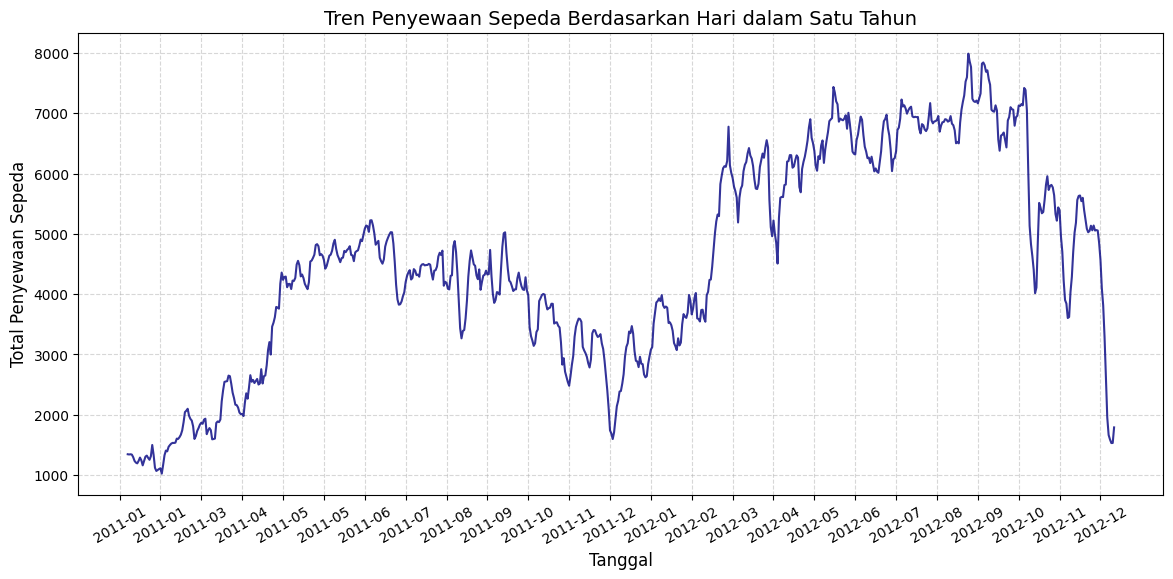

In [55]:
# Buat rolling average agar lebih halus
daily_trend["rolling_avg"] = daily_trend["cnt"].rolling(window=7).mean()

plt.figure(figsize=(14, 6))

# Plot data
sns.lineplot(data=daily_trend, x="dteday", y="rolling_avg", color="navy", alpha=0.8)

plt.title("Tren Penyewaan Sepeda Berdasarkan Hari dalam Satu Tahun", fontsize=14)
plt.xlabel("Tanggal", fontsize=12)
plt.ylabel("Total Penyewaan Sepeda", fontsize=12)

# **Pilih label sumbu X secara manual agar lebih rapi**
tick_positions = daily_trend["dteday"][::30]  # Ambil setiap 30 hari (kurangi kepadatan label)
plt.xticks(ticks=tick_positions, labels=tick_positions.dt.strftime('%Y-%m'), rotation=30, fontsize=10)

plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

### Pertanyaan 4: Bagaimana tren penyewaan sepeda berdasarkan hari libur dan hari kerja?

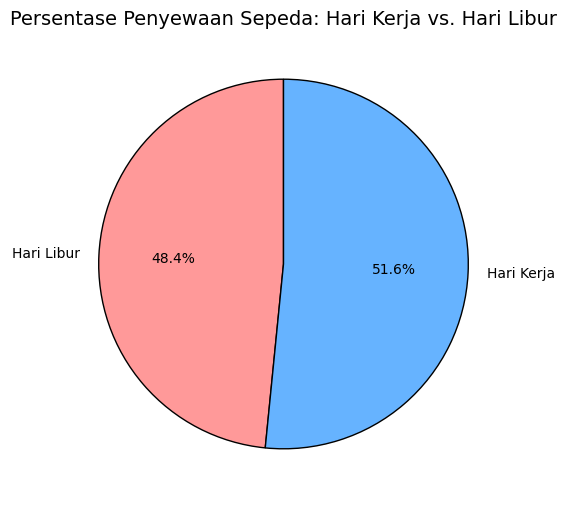

In [64]:
plt.figure(figsize=(6, 6))
colors = ["#ff9999", "#66b3ff"]  # Warna untuk hari libur dan hari kerja
labels = ["Hari Libur", "Hari Kerja"]

plt.pie(workday_trend["cnt"], labels=labels, autopct="%1.1f%%", colors=colors, startangle=90, wedgeprops={"edgecolor": "black"})

plt.title("Persentase Penyewaan Sepeda: Hari Kerja vs. Hari Libur", fontsize=14)
plt.show()

**Insight:**
- Penyewaan sepeda tertinggi di musim panas dan gugur, terutama saat cuaca cerah atau berawan, sementara hujan menurunkan penyewaan di semua musim. Musim semi dan dingin cenderung memiliki permintaan lebih rendah. 
- Pola penggunaan sepeda menunjukkan bahwa sepeda digunakan terutama untuk transportasi kerja/sekolah pada hari kerja (pagi & sore) dan untuk rekreasi pada akhir pekan (sore hari).
- Penyewaan sepeda menunjukkan tren peningkatan secara umum dengan beberapa pola musiman. Penurunan tajam di akhir periode bisa disebabkan oleh faktor eksternal seperti perubahan cuaca, musim liburan, atau faktor kebijakan.
- Penyewaan sepeda pada hari kerja lebih tinggi (51,6%) dibandingkan hari libur (48,4%).

## Conclusion

- **Conclution pertanyaan 1:**
Musim dan kondisi cuaca memiliki dampak signifikan terhadap jumlah penyewaan sepeda. Penyewaan sepeda cenderung tertinggi pada musim panas dan gugur, terutama saat cuaca cerah atau berawan, menunjukkan bahwa kondisi hangat dan stabil mendorong lebih banyak penggunaan sepeda. Sebaliknya, hujan ringan maupun hujan lebat secara signifikan menurunkan jumlah penyewaan di semua musim, dengan dampak terbesar terjadi saat hujan lebat. Musim semi dan musim dingin memiliki tingkat penyewaan yang lebih rendah, kemungkinan karena suhu yang lebih dingin dan kondisi yang kurang mendukung untuk bersepeda. Dengan pola ini, pengelola penyewaan sepeda dapat menyesuaikan stok dan strategi pemasaran, seperti meningkatkan ketersediaan sepeda di musim panas dan gugur serta mengantisipasi penurunan permintaan saat musim dingin dan musim semi.

- **Conclution pertanyaan 2:**
Penyewaan sepeda menunjukkan pola yang berfluktuasi berdasarkan jam dan hari dalam seminggu. Penggunaan sepeda rendah pada dini hari dan meningkat selama jam sibuk pagi (07:00 - 09:00) dan sore (17:00 - 19:00), menunjukkan peran penting sepeda dalam transportasi komuter. Hari kerja cenderung memiliki lebih banyak pengguna dibandingkan akhir pekan. Akhir pekan menunjukkan pola penggunaan yang lebih fleksibel dengan lonjakan aktivitas yang lebih merata sepanjang hari. Strategi operasional dapat disesuaikan dengan menambah jumlah sepeda di jam sibuk dan menyesuaikan penawaran pada akhir pekan.

- **Conclution pertanyaan 3:**
Terdapat peningkatan signifikan dalam jumlah penyewaan sepeda dari Tahun 2011 ke Tahun 2012, yang menunjukkan tren pertumbuhan positif. Hari Rabu dan Jumat menjadi hari dengan penyewaan tertinggi di Tahun 2. Tren ini dapat digunakan oleh penyedia layanan untuk meningkatkan jumlah sepeda yang tersedia pada hari-hari dengan permintaan tinggi.

- **Conclusion pertanyaan 4:**
Penyewaan sepeda pada hari kerja lebih tinggi (51,6%) dibandingkan hari libur (48,4%). Perbedaannya cukup kecil, menunjukkan bahwa penyewaan sepeda relatif merata antara hari kerja dan hari libur. Hal ini bisa menunjukkan bahwa sepeda digunakan baik untuk keperluan sehari-hari (misalnya, transportasi ke kantor) maupun untuk rekreasi saat hari libur.